Task: 
$\newline$
1.Extracting the s-layer closest to 2 meters in depth. 
$\newline$
2. Create matrix saving the s-layer indexes
$\newline$
3. Plot the matrix.

Firstly doing so for a dataset in 2024 and repeating for other time steps as well as other dates to see if there are any larger changes due to ocean surface elevations

$\newline$

s_rho describes the layers indexed from 0-40 (39), but the depth of the actual layer will vary. It is therefore I need to find which s-layer, 1,2, or 3 etc. that reperesents 2meters at each grid point. Each grid point is 800mx800m in x,y. 

In [14]:
#Importing necessary datasets
import xarray as xr
import matplotlib.pyplot as plt 
import numpy as np 

In [3]:
file = f'/lustre/storeA/project/fou/hi/oper/norkyst_v3/forecast/his/2025/06/01/norkyst800_his_sdepth_20250601T00Z_m00_AN.nc'
#dataset of NORKYST 01.06.2025
ds_norkyst_2024 = xr.open_dataset(file, engine="netcdf4")

ds_norkyst_2024.head()

<xarray.Dataset> Size: 29kB
Dimensions:          (ocean_time: 5, s_w: 5, eta_rho: 5, xi_rho: 5, tracer: 2,
                      s_rho: 5, boundary: 4, eta_psi: 5, xi_psi: 5, eta_u: 5,
                      xi_u: 5, eta_v: 5, xi_v: 5)
Coordinates:
    lat_psi          (eta_psi, xi_psi) float64 200B ...
    lat_rho          (eta_rho, xi_rho) float64 200B ...
    lat_u            (eta_u, xi_u) float64 200B ...
    lat_v            (eta_v, xi_v) float64 200B ...
    lon_psi          (eta_psi, xi_psi) float64 200B ...
    lon_rho          (eta_rho, xi_rho) float64 200B ...
    lon_u            (eta_u, xi_u) float64 200B ...
    lon_v            (eta_v, xi_v) float64 200B ...
  * ocean_time       (ocean_time) datetime64[ns] 40B 2025-06-01 ... 2025-06-0...
  * s_rho            (s_rho) float64 40B -0.9799 -0.9403 -0.9014 -0.8634 -0.8261
  * s_w              (s_w) float64 40B -1.0 -0.96 -0.9208 -0.8823 -0.8446
Dimensions without coordinates: eta_rho, xi_rho, tracer, boundary, eta_psi,
                                xi_psi, eta_u, xi_u, eta_v, xi_v
Data variables: (12/101)
    AKs              (ocean_time, s_w, eta_rho, xi_rho) float32 2kB ...
    Akk_bak          float64 8B ...
    Akp_bak          float64 8B ...
    Akt_bak          (tracer) float64 16B ...
    Akv_bak          float64 8B ...
    Charnok_alpha    float64 8B ...
    ...               ...
    v                (ocean_time, s_rho, eta_v, xi_v) float32 2kB ...
    v_northward      (ocean_time, s_rho, eta_rho, xi_rho) float32 2kB ...
    vbar             (ocean_time, eta_v, xi_v) float32 500B ...
    w                (ocean_time, s_w, eta_rho, xi_rho) float32 2kB ...
    xl               float64 8B ...
    zeta             (ocean_time, eta_rho, xi_rho) float32 500B ...
Attributes: (12/33)
    file:              /nobackup/prod1/metno_op/run/norkyst_v3/output/m00/nor...
    format:            netCDF-4/HDF5 file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             Norkyst V3 forecast model (MET Norway/IMR)
    var_info:          /nobackup/prod1/metno_op/run/norkyst_v3/static_input/n...
    ...                ...
    compiler_flags:    -mcmodel=large -O3
    tiling:            032x016
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       NORKYST, ADD_FSOBC, ADD_M2OBC, ALBEDO, ANA_BSFLUX, ANA...
    NCO:               netCDF Operators version 4.8.1 (Homepage = http://nco....
    history:           Sun Jun  1 18:00:04 2025: ncks -O -7 -L 1 --ppc defaul...

In [4]:
ds_norkyst_2024.s_rho.values
#ds_norkyst_2024.s_w.values

array([-0.97990385, -0.94028846, -0.90144231, -0.86336538, -0.82605769,
       -0.78951923, -0.75375   , -0.71875   , -0.68451923, -0.65105769,
       -0.61836538, -0.58644231, -0.55528846, -0.52490385, -0.49528846,
       -0.46644231, -0.43836538, -0.41105769, -0.38451923, -0.35875   ,
       -0.33375   , -0.30951923, -0.28605769, -0.26336538, -0.24144231,
       -0.22028846, -0.19990385, -0.18028846, -0.16144231, -0.14336538,
       -0.12605769, -0.10951923, -0.09375   , -0.07875   , -0.06451923,
       -0.05105769, -0.03836538, -0.02644231, -0.01528846, -0.00490385])

In [5]:
ds_norkyst_2024.lon_u.values
#print(ds_norkyst_2024["s_rho"][1])

array([[ 8.70283757,  8.7085696 ,  8.71430372, ..., 37.51032287,
        37.52800386, 37.54569181],
       [ 8.69236991,  8.6981006 ,  8.70383338, ..., 37.49906205,
        37.51674629, 37.53443748],
       [ 8.68190016,  8.6876295 ,  8.69336094, ..., 37.48779427,
        37.50548176, 37.5231762 ],
       ...,
       [-4.58786598, -4.58437967, -4.58089182, ..., 18.32999012,
        18.34897997, 18.36798574],
       [-4.60051048, -4.59702675, -4.59354147, ..., 18.30597276,
        18.32495884, 18.34396084],
       [-4.61315651, -4.60967536, -4.60619267, ..., 18.28193949,
        18.30092177, 18.31992   ]], shape=(1148, 2746))

In [6]:
ds_norkyst_2024.lat_u.values

array([[54.29795836, 54.30408031, 54.31020214, ..., 69.23525937,
        69.23925289, 69.24324452],
       [54.30130993, 54.30743261, 54.31355516, ..., 69.24153158,
        69.24552642, 69.24951936],
       [54.30466045, 54.31078385, 54.31690713, ..., 69.24780314,
        69.25179928, 69.25579353],
       ...,
       [57.34377685, 57.35061281, 57.3574489 , ..., 75.70175716,
        75.70768844, 75.71361824],
       [57.34566058, 57.35249703, 57.35933359, ..., 75.70644581,
        75.71237912, 75.71831095],
       [57.34754283, 57.35437975, 57.36121679, ..., 75.71113202,
        75.71706736, 75.72300121]], shape=(1148, 2746))

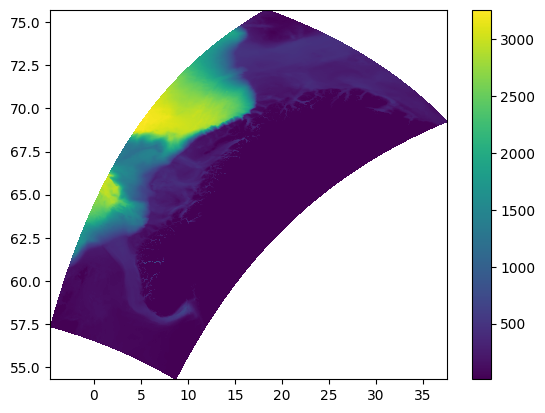

In [12]:
#Vizualitation of the depth of the ocean. Remember that the top layer is the ocean bottom. Meaning yellow is as low as it goes. 
#Therefore h is a representation of the total depth.
plt.pcolor(ds_norkyst_2024["lon_rho"], ds_norkyst_2024["lat_rho"], ds_norkyst_2024["h"])
plt.colorbar()

In [21]:
#Dobbeltsjekker størrelsen på s_rho. Den inneholder 40 verdier. 
print(ds_norkyst_2024["s_rho"].__len__)

#lager en linspace som går fra -1 til 0 og dekker alle 40 verdier i s_rho settet. 
#Her er -1 ved havbunnen og 0 er ved overflaten. Dvs. indeks s_rho = -1 er overflaten, indeks s_rho = -1 er bunn. 
N = 40
S = np.linspace(-1,0,N)

<bound method DataArray.__len__ of <xarray.DataArray 's_rho' (s_rho: 40)> Size: 320B
array([-0.979904, -0.940288, -0.901442, -0.863365, -0.826058, -0.789519,
       -0.75375 , -0.71875 , -0.684519, -0.651058, -0.618365, -0.586442,
       -0.555288, -0.524904, -0.495288, -0.466442, -0.438365, -0.411058,
       -0.384519, -0.35875 , -0.33375 , -0.309519, -0.286058, -0.263365,
       -0.241442, -0.220288, -0.199904, -0.180288, -0.161442, -0.143365,
       -0.126058, -0.109519, -0.09375 , -0.07875 , -0.064519, -0.051058,
       -0.038365, -0.026442, -0.015288, -0.004904])
Coordinates:
  * s_rho    (s_rho) float64 320B -0.9799 -0.9403 -0.9014 ... -0.01529 -0.004904
Attributes:
    long_name:      S-coordinate at RHO-points
    valid_min:      -1.0
    valid_max:      0.0
    positive:       up
    standard_name:  ocean_s_coordinate_g2
    formula_terms:  s: s_rho C: Cs_r eta: zeta depth: h depth_c: hc
    field:          s_rho, scalar>


For å gjøre om fra s-lag til dybde forsøker jeg en metode funnet ved bruk av xroms som gjør:
""legg inn den matematiske metoden her dersom det funker""

In [31]:
#Henter ut alle variabler som trengs til regningen
hc = ds_norkyst_2024["hc"] #Critical depth for stretching
cs_r = ds_norkyst_2024["Cs_r"] #stretching curve at rho points
zeta = ds_norkyst_2024["zeta"] #free-surface 
H = ds_norkyst_2024["h"] #bathymetry at rho-points (depth)
theta_s = ds_norkyst_2024["theta_s"] #stretching surface
theta_b = ds_norkyst_2024["theta_b"] #stretching bottom 

In [40]:
#ds_norkyst_2024.dims
#hc.dims
#cs_r.dims
zeta.dims
#H.dims
#theta_b.dims
#theta_s.dims

('ocean_time', 'eta_rho', 'xi_rho')

In [ ]:
"""
Feilkode pga. ulike dimensjoner. 
Theta for bottom og surface er parametre og har ikke dimensions 
H har eta_rho og xi_rho som dimensjoner
zeta har ocean_time, eta_rho og xi_rho som dimensjoner. 

"""

In [ ]:

def layer_to_depth(Z_rho):
    #Henter ut alle variabler som trengs til regningen
    hc = ds_norkyst_2024["hc"] #Critical depth for stretching
    cs_r = ds_norkyst_2024["Cs_r"] #stretching curve at rho points
    zeta = ds_norkyst_2024["zeta"] #free-surface 
    H = ds_norkyst_2024["h"] #bathymetry at rho-points (depth)
    theta_s = ds_norkyst_2024["theta_s"] #stretching surface
    theta_b = ds_norkyst_2024["theta_b"] #stretching bottom

    S_rho = ((1-theta_b)*np.sinh(theta_s*S) / np.sinh(theta_s)) + (theta_b * np.tanh(theta_s*(S+0.5)) / (2*np.tanh(0.5*theta_s)) - 0.5) 
    Z_rho = zeta + (zeta + H) * S_rho
    return Z_rho

#bug - the variables in use dont have the same dimensions. Valueerror. 



ValueError: dimensions () must have the same length as the number of data dimensions, ndim=1